In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import line_data

In [17]:
GES_with_hi = pd.read_csv('/media/disk/software/iSpec/iSpec_v20190302/input/linelists/transitions/GESv5_atom_hfs_iso.420_920nm/atomic_lines.tsv', sep='\t')
GES_with_hi['diss_energy'] = np.nan
GES_with_hi = GES_with_hi[GES_with_hi['moog_support'] == 'T']
GES_without_hi = pd.read_csv('/media/disk/software/iSpec/iSpec_v20190302/input/linelists/transitions/GESv5_atom_nohfs_noiso.420_920nm/atomic_lines.tsv', sep='\t')
GES_without_hi['diss_energy'] = np.nan
GES_without_hi = GES_without_hi[GES_without_hi['moog_support'] == 'T']

GES_without_hi_moog = GES_without_hi[['wave_A', 'spectrum_moog_species', 'lower_state_eV', 'loggf', 'waals', 'diss_energy', 'theoretical_ew']]
GES_without_hi_moog.columns = ['wavelength', 'element_index', 'EP', 'loggf', 'Walls_damp', 'diss_energy', 'theoretical_ew']
GES_with_hi_moog = GES_with_hi[['wave_A', 'spectrum_moog_species', 'lower_state_eV', 'loggf', 'waals', 'diss_energy', 'theoretical_ew']]
GES_with_hi_moog.columns = ['wavelength', 'element_index', 'EP', 'loggf', 'Walls_damp', 'diss_energy', 'theoretical_ew']

In [19]:
line_data.save_linelist(GES_without_hi_moog, 'files/linelist/ges/ges_nohfs_noiso')

In [1]:
import synth
import model
import re

In [2]:
synth_spec = synth.synth(4500, 3.0, -2.0, 5000, 5100, 28000)
synth_spec.prepare_file()
synth_spec.run_moog(output=True)
synth_spec.read_spectra()

*******************************************************************************
                          MOOG LTE VERSION (FEB 2017)                           
MOOG PARAMETERS; here is the filename: batch.par                                
                       MOOG IS CONTROLLED BY DRIVER synth  
 *******************************************************************************
STANDARD OUTPUT; here is the filename: MOOG.out1                                
RAW SYNTHESIS OUTPUT; here is the filename: MOOG.out2                           
SMOOTHED SYNTHESES OUTPUT; here is the filename: MOOG.out3                      
THE MODEL ATMOSPHERE; here is the filename: model.mod                           
THE LINE LIST; here is the filename: line.list                                  
                                                                                
 <<<<<<<<<<<<<<<<<<<<<<          MOOG HAS ENDED!          >>>>>>>>>>>>>>>>>>>>>>


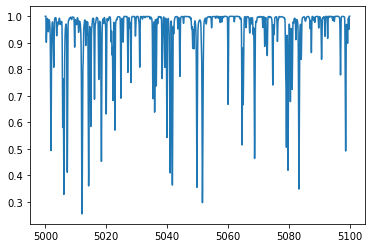

In [6]:
plt.plot(synth_spec.wav, synth_spec.flux)